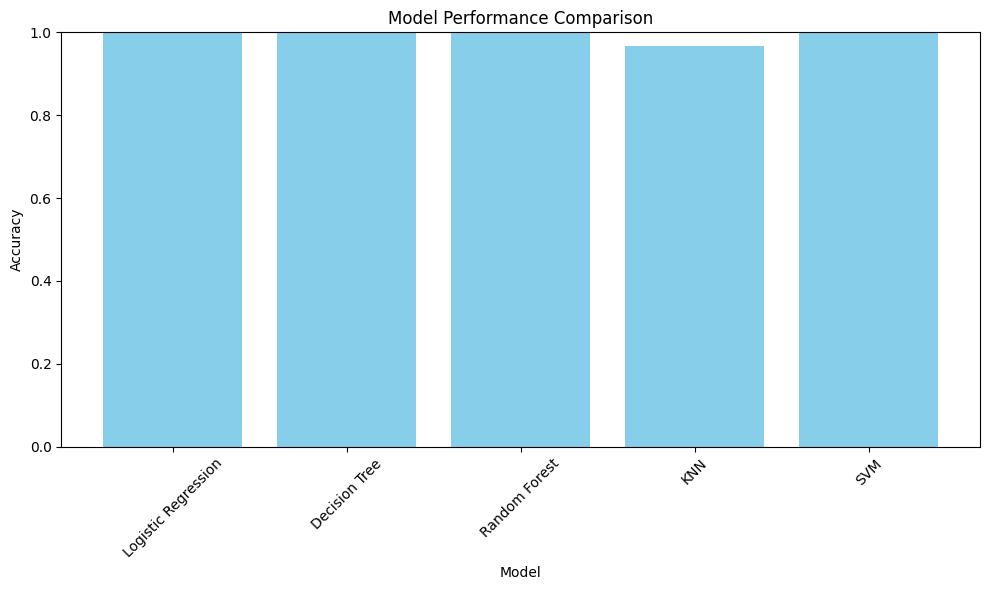

In [1]:
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from dotenv import load_dotenv
from sklearn.svm import SVC
import pandas as pd

# load .env
load_dotenv(dotenv_path=".env")

# Load dataset
df = pd.read_csv(os.getenv("DATASET_PATH"))

# Preprocess
cols = ['Id']  # Drop unwanted columns
df = df.drop(cols, axis=1)

df = df.dropna()  # Drop rows with missing values

# Convert categorical variables (Species) into numerical form
df = pd.get_dummies(df, columns=['Species'], drop_first=False)

# Features (X) and Target (y)
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].values

# Convert y back to a 1D array with species labels
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
y = df[['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']].idxmax(axis=1).map(lambda x: x.split('_')[-1]).values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% datasets for train and 20% for test

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
}

# Initialize dictionary to store accuracies
accuracies = {}

# Directory to save models
model_dir = os.getenv("MODEL_PATH")
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Train, evaluate and save models
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    # Get the accuracy score
    accuracy = accuracy_score(y_test, predictions)
    accuracies[name] = accuracy
    
    # Save the model as a .pkl file
    model_filename = os.path.join(model_dir, f'{name.replace(" ", "_")}_model.pkl')
    joblib.dump(model, model_filename)

# Visualize the model performance using matplotlib
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.ylim([0, 1])
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
